In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from matplotlib import cm

In [35]:
df = pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_diffRoom.csv')
df.tail()

X = []
Y = []

for i in range(len(df)):
    X.append([float(df['std'][i]), float(df['correlation'][i]), 1])
    Y.append(float(df['distance'][i]))
    
X = np.array(X)
Y = np.array(Y)

In [36]:
X.shape

(338, 3)

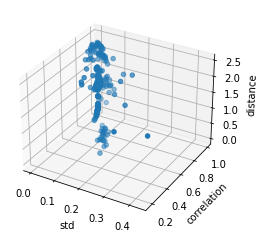

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel('std')
ax.set_ylabel('correlation')
ax.set_zlabel('distance')
plt.show()
#plt.savefig('std-correlation-distance.png')

In [38]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

In [39]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("The r-squared value is: ", r2)

The r-squared value is:  0.10399452608748438


In [40]:
X_test = np.array([0.5, 1, 1])
X_test.shape
X_test = X_test.reshape(-1,3)
print(np.dot(X_test, w))

[0.95298548]


In [41]:
lr = LinearRegression()
lr.fit(X,Y)
y_predict = lr.predict(X)

In [42]:
#For polynomial regression
X = []
Y = []

for i in range(len(df)):
    X.append([float(df['std'][i]), float(df['correlation'][i]), 1])
    Y.append(float(df['distance'][i]))
    
X = np.array(X)
Y = np.array(Y)